# Example: Subjectivity of Priors (and the solution to it)

## Problem 1

Assume we have a coin that has some probability $b$ of flipping to tails. That is, if the coin always flipped to tails, $b = 1$; if it always flipped to heads, $b = 0$; and if the coin were fair, $b = 0.5$.

### Likelihood

The likelihood function for a single coin toss returning heads or tails is:

$$
\begin{align}
p({\rm tails}\,|\,b) & = b \\
p({\rm heads}\,|\,b) & = 1-b
\end{align}
$$

If we define a variable $o$ which is $1$ if the outcome was tails, and 0 if it was heads, the above can be written compactly as:

$$ p(o\,|\,b) = b^o \cdot (1-b)^{1-o} $$

(which you can verify by inserting $o=1$ for tails and and $o=0$ for heads).

### Posterior

Following the Bayes theorem, the posterior for the parameter $b$ after every coin toss will be given by:

$$ p(b\,|\,o) = C \cdot p(o\,|\,b) \cdot p(b) $$

where $p(b)$ is our prior probability (our knowledge) of what $b$ was before the new coin toss. $C$ is the normalizing constant that makes sure the posterior integrates to 1.

### The problems

Get a coin (a real coin!), flip it 10 times, and record the results.

Assuming the initial prior probability $p(b) \propto {\rm const.}$ over the entire range of $b$:

1. Plot the posterior $p(b \,|\, o )$ after each flip. In every plot, also show the $p(b)$ before the toss (the prior).

2. After each flip, print the probability that your coin is approximately fair; that is, what is the probability 
   $p(0.4 < b < 0.6)$? 

3. After each flip, print the probability that your coin strongly prefers heads over tails; that is, what is the probability $p(b<0.25)$? 

Note #1: Don't forget to normalize your posteriors (i.e., compute and multiply by the factor $C$)! This is easily done numerically, for example:

```python
b = np.linspace(0,1,5000)
db = b[1]-b[0]

p = ... compute unnormalized posterior by multiplying likelihood and prior ...
C = 1. / (p * db).sum()  # Riemann sum with simple "rectangle rule"
p = C * p  # our normalized posterior
```


## Problem 2

Repeat the analysis of Problem 1, but starting with the [Jeffreys' prior](https://en.wikipedia.org/wiki/Jeffreys_prior):

$$ p(b) = b^{-0.5}(1-b)^{-0.5}$$

Discuss the difference in how the probabilities change with each coin toss, comparing them to what you obtained in Problem #1. How are they affected by the choice of initial prior? Is there a difference early on vs. after many flips?

Note: Jeffreys' prior is an [improper prior](https://en.wikipedia.org/wiki/Prior_probability#Improper_priors), with singularities (infinities) at $b=0$ and $b=1$. Therefore when you compute and plot it, choose a range some $\epsilon$ away from those (e.g., [0.00001, 0.99999], rather than a full range [0, 1]). Otherwise `numpy` and `matplotlib` will complain about infinities in plots where the Jeffreys prior shows up.

# Solutions

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.


## Problem 1: the coin toss

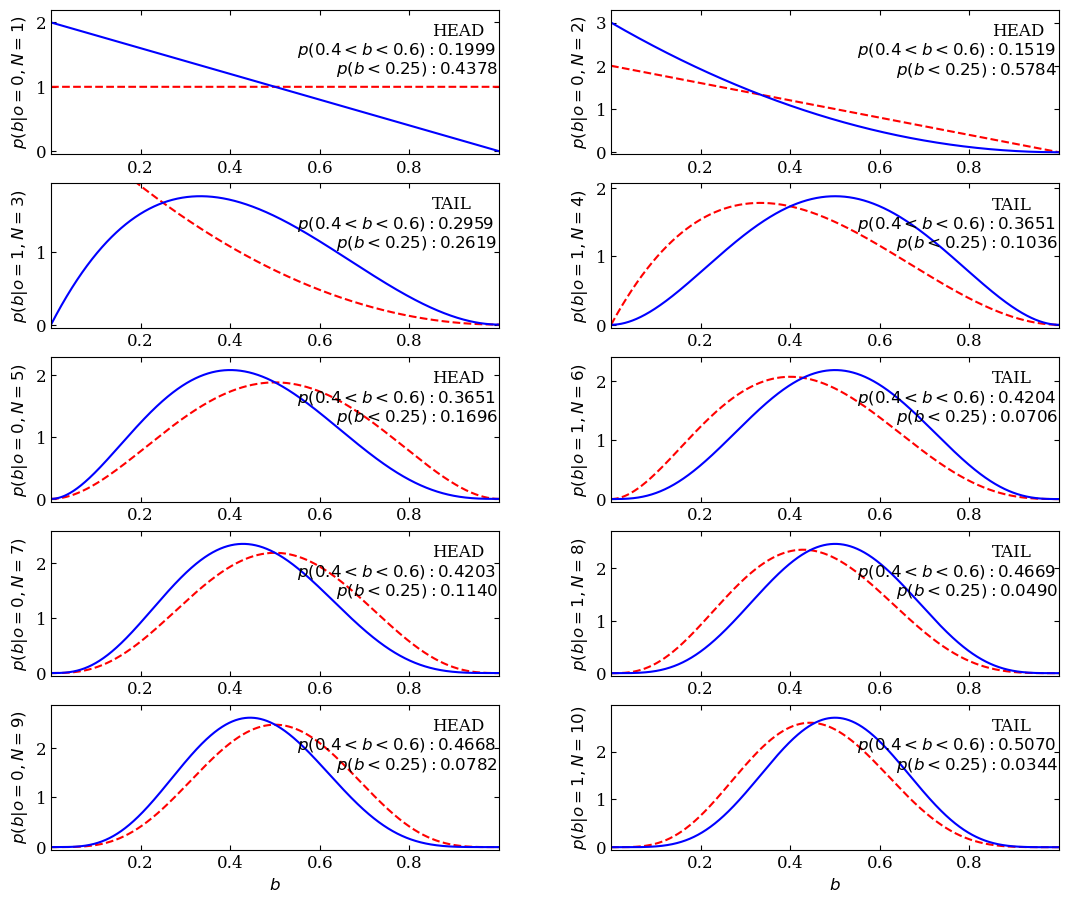

In [2]:
# results for my coin (0:head, 1: tail)
flipData = [0, 0, 1, 1, 0, 1, 0, 1, 0, 1]
# plotting setup 
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.25, bottom=0.18)
 
# b grid for computing p(b) 
b = np.linspace(0.00001,1-0.00001,5000)
db = b[1]-b[0]
# prior 
p_b = 1.0 + 0*b   # flat prior

# loop over data
for i in range(1,len(flipData)+1):
    ax = fig.add_subplot(int(np.ceil(len(flipData) / 2)), 2, i)
    # show p_b before this data point is added
    ax.plot(b, p_b, '--r')
    # now get new p_b
    N = i 
    o = flipData[i-1]
    p_b = p_b * b**o * (1-b)**(1-o)
    p_b /= p_b.sum()
    p_b /= db
    # p_b after this data point is added
    label=' z'
    ax.plot(b, p_b, '-b', label=label)
    ax.set_xlabel('$b$')
    s = '$p(b|o=%i' % o
    s = s + ', N=%i)$' % N
    if (flipData[i-1] == 0): 
        ax.text(0.85, np.max(p_b)*0.9,'HEAD')
    else:
        ax.text(0.85, np.max(p_b)*0.9,'TAIL')
    ax.set_ylabel(s)
    ax.set_ylim(-0.05, np.max(p_b)*1.1)
    
    cuml_p_b = p_b.cumsum()
    cuml_p_b /= cuml_p_b[-1]
    ax.text(0.55, np.max(p_b)*0.75, r'$p(0.4<b<0.6): %.4f$' % (np.interp(0.6, b, cuml_p_b) - np.interp(0.4, b, cuml_p_b)))
    ax.text(0.635, np.max(p_b)*0.60, r'$p(b<0.25): %.4f$' % np.interp(0.25, b, cuml_p_b)) 

plt.show()

## Problem 2: reanalysis with the Jeffreys prior

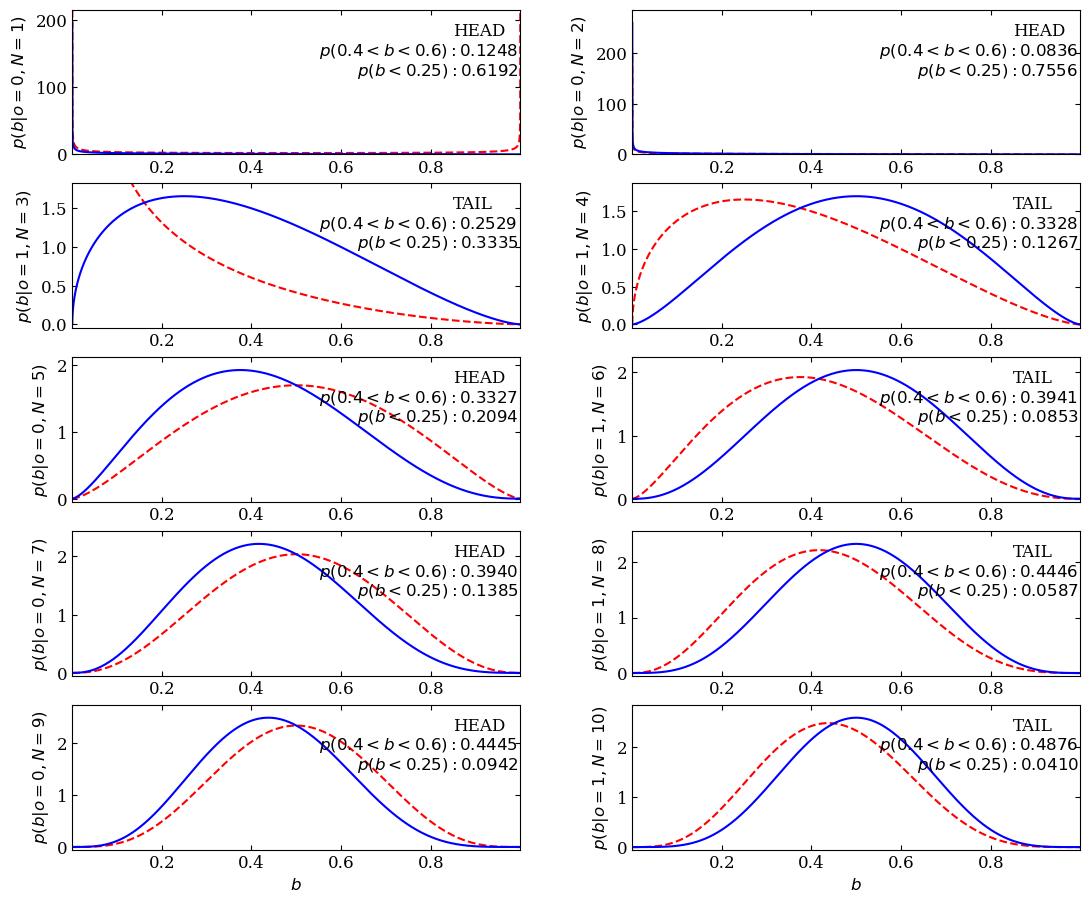

In [3]:
# prior 
p_b = (b*(1-b))**(-0.5)   # Jeffreys prior

# plotting setup 
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.25, bottom=0.18)
 
# loop over data
for i in range(1,len(flipData)+1):
    ax = fig.add_subplot(int(np.ceil(len(flipData) / 2)), 2, i)
    # show p_b before this data point is added
    ax.plot(b, p_b, '--r')
    # now get new p_b
    N = i 
    o = flipData[i-1]
    p_b = p_b * b**o * (1-b)**(1-o)
    p_b /= p_b.sum()
    p_b /= db
    # p_b after this data point is added
    label=' z'
    ax.plot(b, p_b, '-b', label=label)
    ax.set_xlabel('$b$')
    s = '$p(b|o=%i' % o
    s = s + ', N=%i)$' % N
    if (flipData[i-1] == 0): 
        ax.text(0.85, np.max(p_b)*0.9,'HEAD')
    else:
        ax.text(0.85, np.max(p_b)*0.9,'TAIL')
    ax.set_ylabel(s)
    ax.set_ylim(-0.05, np.max(p_b)*1.1)
    
    cuml_p_b = p_b.cumsum()
    cuml_p_b /= cuml_p_b[-1]
    ax.text(0.55, np.max(p_b)*0.75, r'$p(0.4<b<0.6): %.4f$' % (np.interp(0.6, b, cuml_p_b) - np.interp(0.4, b, cuml_p_b)))
    ax.text(0.635, np.max(p_b)*0.60, r'$p(b<0.25): %.4f$' % np.interp(0.25, b, cuml_p_b)) 

plt.show()

The choice of uniform vs. Jeffreys prior affects the probabilities after the first few tosses: Jeffreys prior pushes the posterior more strongly towards one of the two extremes (b=0 or b=1) than the uniform prior does.

But after about $\sim 5$ tosses, the differences largely vanish; by the time we're at $N=10$, the posteriors have become largely insensitive to the initial choice of prior.

This shows how the choice of the prior is most relevant when there are very few measurements -- after a sufficient number of measurements, what we thought we knew at the beginning becomes largely irrelevant, as the information brought it by the data has corrected for any of our (potentially incorrect) initial assumptions.